# Student performance forcasting 

## Abstract 
Determining whether a student performance can be predicted, hence improved, based on different factors that play a role in a student educational life. The main aim of this project, Is to apply machine learning techniques that can put light on the most important factors that impact a student performance, In order to gain a better understanding of learners. 

## Motivation
Deciding whether a student will fail or pass is a challenging task. Administators, teachers, and essentially parents, deeply want to know whether a student will fail, or succeed, In order to make good decisions. Based on several factors like age, freetime, activities, parents job etc ... We will try to get a clearer idea on how all these factors influence the student grades. 
In order to achieve that, we will start with an existing data and use supervised learning techniques In order to predict the grades of a student. 
The main focus will be on interpreting the importance of each factor in a student's life. 

## Dataset 
<li> school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) </li>
<li> sex - student's sex (binary: 'F' - female or 'M' - male)
<li> age - student's age (numeric: from 15 to 22)</li>
<li> address - student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li>famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li>Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li> Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 -  higher education)</li>
<li> Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)</li>
<li> Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li> Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li> reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li> guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li>traveltime - home to school travel time (numeric: 1 -  less than 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li>studytime - weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours)</li>
<li>failures - number of past class failures (numeric: n if n>=1 and n less than 3, else 4)</li>
<li> schoolsup - extra educational support (binary: yes or no)</li>
<li> famsup - family educational support (binary: yes or no)</li>
<li> paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li> activities - extra-curricular activities (binary: yes or no)</li>
<li> nursery - attended nursery school (binary: yes or no)</li>
<li> higher - wants to take higher education (binary: yes or no)</li>
<li> internet - Internet access at home (binary: yes or no)</li>
<li> romantic - with a romantic relationship (binary: yes or no)</li>
<li> famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li> freetime - free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li> goout - going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li>Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li> Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li> health - current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li> absences - number of school absences (numeric: from 0 to 93)</li>
<li> G1 - first period grade (numeric: from 0 to 20) </li>
<li> G2 - second period grade (numeric: from 0 to 20)</li>
<b>target variable :<br></b>
    <li> G3 - final grade (numeric: from 0 to 20, output target)</li>


In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats as stats 
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
df1=pd.read_csv('student-por.csv',sep=';')
df2=pd.read_csv('student-mat.csv',sep=';')
df = pd.concat([df1, df2], ignore_index=True, sort=False)


In [3]:
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F   18       U     GT3       A     4     4   at_home   teacher   
1        GP   F   17       U     GT3       T     1     1   at_home     other   
2        GP   F   15       U     LE3       T     1     1   at_home     other   
3        GP   F   15       U     GT3       T     4     2    health  services   
4        GP   F   16       U     GT3       T     3     3     other     other   
...     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
1039     MS   M   20       U     LE3       A     2     2  services  services   
1040     MS   M   17       U     LE3       T     3     1  services  services   
1041     MS   M   21       R     GT3       T     1     1     other     other   
1042     MS   M   18       R     LE3       T     3     2  services     other   
1043     MS   M   19       U     LE3       T     1     1     other   at_home   

      ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0     ...      4        3      4     1     1      3        4   0  11  11  
1     ...      5        3      3     1     1      3        2   9  11  11  
2     ...      4        3      2     2     3      3        6  12  13  12  
3     ...      3        2      2     1     1      5        0  14  14  14  
4     ...      4        3      2     1     2      5        0  11  13  13  
...   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
1039  ...      5        5      4     4     5      4       11   9   9   9  
1040  ...      2        4      5     3     4      2        3  14  16  16  
1041  ...      5        5      3     3     3      3        3  10   8   7  
1042  ...      4        4      1     3     4      5        0  11  12  10  
1043  ...      3        2      3     3     3      5        5   8   9   9  

[1044 rows x 33 columns]

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isna().sum().sum()

In [ ]:
df.duplicated().sum()

### Categorizing data 

In [4]:
binary_cols = list()
categorical_features = list()
numeric_features = df.select_dtypes(['float','int']).columns
objects=df.select_dtypes('object').columns
for col in objects: 
    if df[col].nunique() >2 : 
        categorical_features.append(col)
    else : 
        binary_cols.append(col)
print(f"Numerical features : {numeric_features}") 
print(f"Categorical features :  {categorical_features}")
print(f"binary features : {binary_cols}")

Numerical features : Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
Categorical features :  ['Mjob', 'Fjob', 'reason', 'guardian']
binary features : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [5]:
df[numeric_features].describe()

age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       0.000000     4.000000     3.000000     2.000000     1.000000   
50%       0.000000     4.000000     3.000000     3.000000     1.000000   
75%       0.000000     5.000000     4.000000     4.000000     2.000000   
max       3.000000     5.000000     5.000000     5.000000     5.000000   

              Walc       health     absences           G1           G2  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      2.284483     3.543103     4.434866    11.213602    11.246169   
std       1.285105     1.424703     6.210017     2.983394     3.285071   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%       1.000000     3.000000     0.000000     9.000000     9.000000   
50%       2.000000     4.000000     2.000000    11.000000    11.000000   
75%       3.000000     5.000000     6.000000    13.000000    13.000000   
max       5.000000     5.000000    75.000000    19.000000    19.000000   

                G3  
count  1044.000000  
mean     11.341954  
std       3.864796  
min       0.000000  
25%      10.000000  
50%      11.000000  
75%      14.000000  
max      20.000000

<AxesSubplot:>

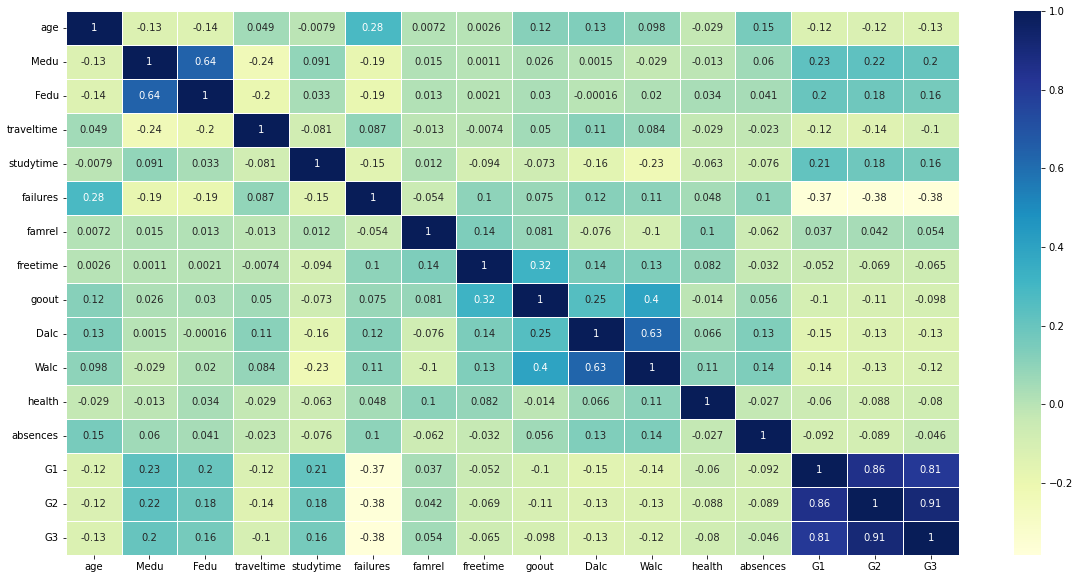

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="YlGnBu",linewidths=0.5,annot=True)

We may see a high correlation between G1 and G2, which is quite reasonable, we will be keeping both while using the random forests model but we will elliminate one while using the logistic regression model since that It may lead to overfitting. 
The same thing applies to Dalc and Walc, as well as Fedu and Medu, but regarding these ones we will be running tests on them later on. 

## Feature encoding

In [ ]:
df[categorical_features]

In [7]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_features])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=one_hot_encoder.get_feature_names(categorical_features))

# Apply binary encoding to the specified columns
binary_encoder = BinaryEncoder(cols=binary_cols)
binary_encoded = binary_encoder.fit_transform(df[binary_cols])
#le_data=pd.DataFrame()
#le_encoder = LabelEncoder()
#for feature in binary_cols:
 #   binary_data[feature] = binary_encoder.fit_transform(df[feature])
# Concatenate the encoded features with the original DataFrame
encoded_data = pd.concat([binary_encoded, df[numeric_features],one_hot_encoded_df], axis=1)

C:\Users\rayen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
encoded_data

school_0  school_1  sex_0  sex_1  address_0  address_1  famsize_0  \
0            0         1      0      1          0          1          0   
1            0         1      0      1          0          1          0   
2            0         1      0      1          0          1          1   
3            0         1      0      1          0          1          0   
4            0         1      0      1          0          1          0   
...        ...       ...    ...    ...        ...        ...        ...   
1039         1         0      1      0          0          1          1   
1040         1         0      1      0          0          1          1   
1041         1         0      1      0          1          0          0   
1042         1         0      1      0          1          0          1   
1043         1         0      1      0          0          1          1   

      famsize_1  Pstatus_0  Pstatus_1  ...  Fjob_other  Fjob_services  \
0             1          0          1  ...         0.0            0.0   
1             1          1          0  ...         1.0            0.0   
2             0          1          0  ...         1.0            0.0   
3             1          1          0  ...         0.0            1.0   
4             1          1          0  ...         1.0            0.0   
...         ...        ...        ...  ...         ...            ...   
1039          0          0          1  ...         0.0            1.0   
1040          0          1          0  ...         0.0            1.0   
1041          1          1          0  ...         1.0            0.0   
1042          0          1          0  ...         1.0            0.0   
1043          0          1          0  ...         0.0            0.0   

      Fjob_teacher  reason_course  reason_home  reason_other  \
0              1.0            1.0          0.0           0.0   
1              0.0            1.0          0.0           0.0   
2              0.0            0.0          0.0           1.0   
3              0.0            0.0          1.0           0.0   
4              0.0            0.0          1.0           0.0   
...            ...            ...          ...           ...   
1039           0.0            1.0          0.0           0.0   
1040           0.0            1.0          0.0           0.0   
1041           0.0            1.0          0.0           0.0   
1042           0.0            1.0          0.0           0.0   
1043           0.0            1.0          0.0           0.0   

      reason_reputation  guardian_father  guardian_mother  guardian_other  
0                   0.0              0.0              1.0             0.0  
1                   0.0              1.0              0.0             0.0  
2                   0.0              0.0              1.0             0.0  
3                   0.0              0.0              1.0             0.0  
4                   0.0              1.0              0.0             0.0  
...                 ...              ...              ...             ...  
1039                0.0              0.0              0.0             1.0  
1040                0.0              0.0              1.0             0.0  
1041                0.0              0.0              0.0             1.0  
1042                0.0              0.0              1.0             0.0  
1043                0.0              1.0              0.0             0.0  

[1044 rows x 59 columns]

In [9]:
encoded_data['G3']=np.where(df['G3']>10,'pass','fail')

In [10]:
encoded_data['G3'].value_counts(normalize=True)

pass    0.633142
fail    0.366858
Name: G3, dtype: float64

## Testing on the logistic regression model 

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in encoded_data.columns if x != 'G3']


# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(encoded_data[feature_cols], encoded_data['G3']))

# Create the data sets
X_train = encoded_data.loc[train_idx, feature_cols]
y_train = encoded_data.loc[train_idx, 'G3']

X_test = encoded_data.loc[test_idx, feature_cols]
y_test = encoded_data.loc[test_idx, 'G3']

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

In [12]:
from sklearn.linear_model import LogisticRegression
scores = pd.DataFrame(columns=['Model','score'])
logist_model = LogisticRegression(max_iter=100000)
logist_model = logist_model.fit(X_train, y_train)
score = logist_model.score(X_test, y_test)
y_pred=logist_model.predict(X_test)
scores = scores.append({'Model':'Logistic regression','score' : score}, ignore_index=True) 
scores

C:\Users\rayen\AppData\Local\Temp\ipykernel_4192\2287190000.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'Model':'Logistic regression','score' : score}, ignore_index=True)


Model     score
0  Logistic regression  0.901274

In [ ]:

param_grid = {
    'pca__n_components': [10, 15, 20, 40, 50, 59],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2','l1'],
    'logreg__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
}
logreg = LogisticRegression(max_iter=100000) 
pca = PCA()
grid_search = GridSearchCV(
    estimator=Pipeline([('pca', pca), ('logreg', logreg)]),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)







In [ ]:
from skopt import BayesSearchCV
pipe = Pipeline([
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])

# Define the hyperparameter search space
search_space = {
    'pca__n_components': [10, 15, 17,20,25,30,32],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

# Create the BayesSearchCV object
bayes_cv = BayesSearchCV(
    pipe,
    search_space,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    random_state=42
)

# Fit the BayesSearchCV object to the data
bayes_cv.fit(X_train, y_train)

In [ ]:
bayes_cv.best_estimator_

In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [14]:
pca = PCA(n_components=14)
from sklearn.metrics import accuracy_score
# Transform the data using the trained PCA object
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

# Set up the logistic regression model with the best hyperparameters
logreg = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=0.19
)

# Train the logistic regression model on the transformed training data
logreg.fit(X_train_transformed, y_train)

# Make predictions on the transformed testing data
y_pred = logreg.predict(X_test_transformed)

# Evaluate the performance of the trained model on the testing data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on testing data: ", accuracy)


Accuracy on testing data:  0.9140127388535032


In [15]:
scores=scores.append({'Model':'Logistic regression_PCA','score' : accuracy}, ignore_index=True) 
scores

C:\Users\rayen\AppData\Local\Temp\ipykernel_4192\2353376457.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append({'Model':'Logistic regression_PCA','score' : accuracy}, ignore_index=True)


Model     score
0      Logistic regression  0.901274
1  Logistic regression_PCA  0.914013

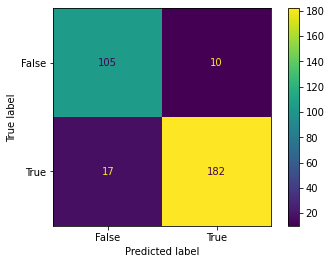

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()


In [17]:
coef=logreg.coef_

In [18]:

for i in range(len(coef[0])):
    print(f"PC{i+1} coefficient: {coef[0][i]}")

PC1 coefficient: -0.19187031591597475
PC2 coefficient: -1.2268306572135925
PC3 coefficient: 0.09069542402513861
PC4 coefficient: -0.09094506556765437
PC5 coefficient: 0.0021607335702608127
PC6 coefficient: -0.45733054912892185
PC7 coefficient: 0.12236581734171695
PC8 coefficient: 0.0
PC9 coefficient: -0.13454723708225227
PC10 coefficient: 0.0
PC11 coefficient: 0.10440316868293628
PC12 coefficient: 0.0
PC13 coefficient: -0.12268546138589076
PC14 coefficient: -0.2470854470363004


Okay so mainly we will be analyzing and interpreting the 3 following components : pc2,pc6,pc14 since that they have the most significant affect on our target variable.
<ul> 
    <li> The second component is having a huge negative impact on the target variable with -1.227 coef, it is mainly dominating the other coefficients.</li> 
    <li> Pc6 is itself having a remarkable impact with a -0.45 coef </li> 
    <li> Pc14 isn't affecting the target variable that much, but it may be used later in interpretations. </li> 

In [19]:
feature_weights = np.multiply(pca.components_, np.sqrt(pca.explained_variance_[:, np.newaxis]))
most_important_weights = np.asarray([feature_weights[1],feature_weights[5],feature_weights[13]])
# print the weights of each original feature in each principal component
for i in range(most_important_weights.shape[0]):
    print(f"PC{i+1} weights:")
    for j in range(feature_weights.shape[1]):
        if (encoded_data.columns[j] !='G3') : 
            print(f"{encoded_data.columns[j]}: {most_important_weights[i][j]}")

PC1 weights:
school_0: 0.09249978632295205
school_1: -0.09249978632295235
sex_0: 0.0105706720410427
sex_1: -0.0105706720410427
address_0: 0.06575244944316198
address_1: -0.06575244944316197
famsize_0: -0.027681076353713193
famsize_1: 0.027681076353713172
Pstatus_0: 0.006037907141399206
Pstatus_1: -0.006037907141399206
schoolsup_0: -0.04089228108010775
schoolsup_1: 0.04089228108010775
famsup_0: 0.005188754805153555
famsup_1: -0.005188754805153555
paid_0: -0.011589965979420658
paid_1: 0.011589965979420663
activities_0: -0.022543951655603054
activities_1: 0.022543951655603054
nursery_0: 0.01857802933532701
nursery_1: -0.01857802933532701
higher_0: 0.07508170299174066
higher_1: -0.07508170299174066
internet_0: -0.06735984154365397
internet_1: 0.06735984154365397
romantic_0: 0.036335952101107745
romantic_1: -0.036335952101107745
age: 0.08921073034592003
Medu: -0.30481276489072234
Fedu: -0.24990626904995497
traveltime: 0.12991274708002223
studytime: -0.1560705583527816
failures: 0.2508825569

In [21]:
from sklearn.feature_selection import RFE
pipeline = Pipeline([
    ('rfe', RFE(estimator=LogisticRegression(solver='liblinear'))),
    ('lr', LogisticRegression(solver='liblinear'))
])

# Define the hyperparameter grid
param_grid = {
    'rfe__n_features_to_select': [10, 5, 15, 20, 33, 28, 50, 59],
    'lr__C': [0.01, 0.1, 1, 10, 100],
}

# Create a GridSearchCV object
cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
cv.fit(X_train, y_train)

# Get the best hyperparameters and score
print('Best hyperparameters:', cv.best_params_)
print('Best score:', cv.best_score_)

Best hyperparameters: {'lr__C': 1, 'rfe__n_features_to_select': 10}
Best score: 0.9178082191780822


In [22]:
y_pred = cv.predict(X_test)
acc_log_rfe=accuracy_score(y_test,y_pred)


In [23]:
scores=scores.append({'Model':'Logreg with RFE','score' : acc_log_rfe}, ignore_index=True) 
scores

C:\Users\rayen\AppData\Local\Temp\ipykernel_4192\2526892535.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores=scores.append({'Model':'Logreg with RFE','score' : acc_log_rfe}, ignore_index=True)


Model     score
0      Logistic regression  0.901274
1  Logistic regression_PCA  0.914013
2          Logreg with RFE  0.678344

As seen RFE is not helping the Lr model so we can't rely on it on further analysis. 

## Testing on the random forests model